In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
# Filtering Dataframe ON United States And Data Analysts
DF_DA_US = df[(df['job_country'] == 'United States')& (df['job_title_short'] == 'Data Analyst')].copy()

# Bar Plot seaborn

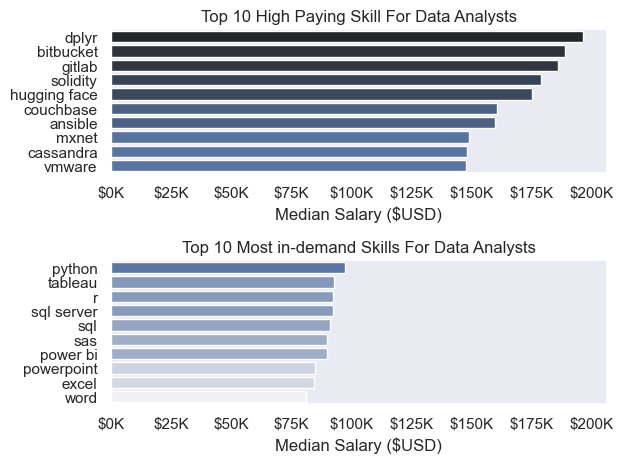

In [33]:

DF_Explode = DF_DA_US.explode('job_skills')
DF_Explode = DF_Explode.dropna(subset='salary_year_avg')
DF_DA_grouped =  DF_Explode.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
DF_DA_top_paid = DF_DA_grouped.sort_values(by='median',ascending=False).head(10)
DF_DA_top_skills = DF_DA_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
fig,ax = plt.subplots(2,1)


sns.set_theme(style='dark')
sns.barplot(data=DF_DA_top_paid,x='median',y=DF_DA_top_paid.index ,ax=ax[0],hue='median',palette='dark:b_r',legend=False)
# DF_DA_top_paid.plot(kind='barh',y='median',ax=ax[0],legend=False)
# ax[0].invert_yaxis()
ax[0].set_xlabel('Median Salary ($USD)')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 High Paying Skill For Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x/1000)}K"))

sns.barplot(data=DF_DA_top_skills,x='median',y=DF_DA_top_skills.index ,ax=ax[1],hue='median',palette='light:b',legend=False)
# DF_DA_top_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
# ax[1].invert_yaxis()
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most in-demand Skills For Data Analysts')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x/1000)}K"))

fig.tight_layout()
plt.show()


# Histogram Seaborn

<!-- # Histogram Seaborn -->

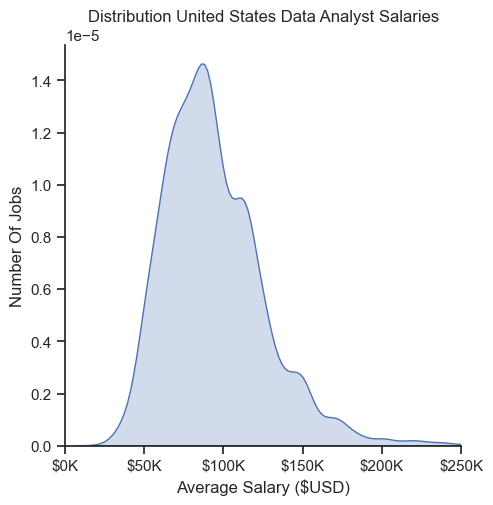

In [ ]:
# DF_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='Black')
sns.set_theme(style='ticks')
sns.displot(DF_DA_US['salary_year_avg'],kind='kde',fill=True)
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f"${int(x/1000)}K"))
plt.xlabel('Average Salary ($USD)')
plt.ylabel('Number Of Jobs')
plt.title('Distribution United States Data Analyst Salaries')
plt.show()